# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [2]:
# can comment out after executing
#!unzip processed_celeba_small.zip

In [3]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import problem_unittests as tests
#import helper

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [4]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

In [5]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    
    # DONE: Implement function and return a dataloader
    num_workers = 0
    
    # Resize and normilize the images
    transform = transforms.Compose([transforms.Resize(image_size), # resize to image_size x image_size
                                    transforms.ToTensor()])
    
    # get data folder
    data_path = './' + data_dir + '/celeba'
    
    # define dataset using ImageFolder
    data_set = datasets.ImageFolder(data_path, transform)
    
    # create and return data loader
    data_loader = DataLoader(dataset=data_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    
    return data_loader


## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [6]:
# Define function hyperparameters
batch_size = 64
img_size = 32

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

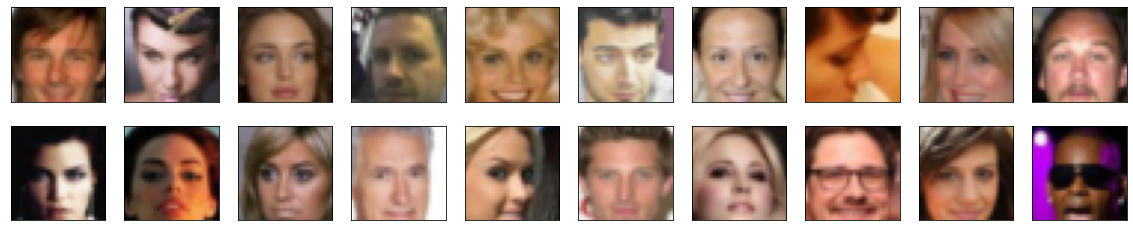

In [7]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [8]:
# DONE: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    min, max = feature_range
    x = x * (max - min) + min
    return x

In [9]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.9922)
Max:  tensor(0.8588)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [10]:
import torch.nn as nn
import torch.nn.functional as F

In [11]:
# helper conv function
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels, out_channels, 
                           kernel_size, stride, padding, bias=False)
    
    # append conv layer
    layers.append(conv_layer)

    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
     
    # using Sequential container
    return nn.Sequential(*layers)

In [12]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()
        
        # DONE: complete init function
        
        self.conv_dim = conv_dim
        # 32 x 32 input
        self.conv1 = conv(3, conv_dim, 4, batch_norm=False) # first layer without batch norm
        # 16 x 16 out
        self.conv2 = conv(conv_dim, conv_dim*2, 4)
        # 8 x 8 out
        self.conv3 = conv(conv_dim*2, conv_dim*4, 4)
        # 4 x 4 out
        
        # fully-connected layer
        self.fc = nn.Linear(conv_dim*4*4*4, 1)
        
        # leaky relu
        self.leaky_relu = nn.LeakyReLU(0.2)
        

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        # DONE: define feedforward behavior
        # all hidden layers + leaky relu activation
        out = self.leaky_relu(self.conv1(x))
        out = self.leaky_relu(self.conv2(out))
        out = self.leaky_relu(self.conv3(out))
        
        # flatten
        out = out.view(-1, self.conv_dim*4*4*4)
        
        # final output fully-connected layer
        out = self.fc(out)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(Discriminator)

Tests Passed


## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [13]:
# helper deconv function
def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a transposed-convolutional layer, with optional batch normalization.
    """
    # create a sequence of transpose + optional batch norm layers
    layers = []
    transpose_conv_layer = nn.ConvTranspose2d(in_channels, out_channels, 
                                              kernel_size, stride, padding, bias=False)
    # append transpose convolutional layer
    layers.append(transpose_conv_layer)
    
    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
        
    return nn.Sequential(*layers)

In [14]:
class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()

        # DONE: complete init function
        
        self.conv_dim = conv_dim
        
        # first, fully-connected layer
        self.fc = nn.Linear(z_size, conv_dim*4*4*4)

        # transpose conv layers
        self.t_conv1 = deconv(conv_dim*4, conv_dim*2, 4)
        self.t_conv2 = deconv(conv_dim*2, conv_dim, 4)
        self.t_conv3 = deconv(conv_dim, 3, 4, batch_norm=False)
        
        # tanh and relu activation functions
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # DONE: define feedforward behavior
        
        # fully-connected + reshape 
        out = self.fc(x)
        out = out.view(-1, self.conv_dim*4, 4, 4) # (batch_size, depth, 4, 4)
        
        # hidden transpose conv layers + relu
        out = self.relu(self.t_conv1(out))
        out = self.relu(self.t_conv2(out))
        
        # last layer + tanh activation
        out = self.t_conv3(out)
        out = self.tanh(out)
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(Generator)

Tests Passed


## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [15]:
from torch.nn import init

def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    
    # DONE: Apply initial weights to convolutional and linear layers
    if hasattr(m, 'weight') and (classname.find('Conv') != -1 or classname.find('Linear') != -1):
        init.normal_(m.weight.data, 0.0, 0.02)
    

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [17]:
# Define model hyperparams
d_conv_dim = 64
g_conv_dim = 64
z_size = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc): Linear(in_features=4096, out_features=1, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.2)
)

Generator(
  (fc): Linear(in_features=100, out_features=4096, bias=True)
  (t_conv1): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (t_conv2): Sequential(
    (0): ConvTranspose2d(128, 64, ker

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [19]:
def real_loss(D_out, smooth=False):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
        # smooth, real labels = 0.9
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1
    # move labels to GPU if available     
    if train_on_gpu:
        labels = labels.cuda()
    # binary cross entropy with logits loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    if train_on_gpu:
        labels = labels.cuda()
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [20]:
import torch.optim as optim

# params
lr = 0.0002
beta1=0.5
beta2=0.999 # default value

# Create optimizers for the discriminator D and generator G
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [22]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    
    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images)

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            
            # ============================================
            #            TRAIN THE DISCRIMINATOR
            # ============================================
            
            # 1. Train the discriminator on real and fake images
            d_optimizer.zero_grad()
            
            # 1.1. Compute the discriminator losses on real images
            if train_on_gpu:
                real_images = real_images.cuda()
                
            D_real = D(real_images)
            d_real_loss = real_loss(D_real, smooth=True)
            
            # 1.2. Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)
            
            # 1.3. Compute the discriminator losses on fake images
            D_fake = D(fake_images)
            d_fake_loss = fake_loss(D_fake)

            # 1.4. Add up losses and perform backprop
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()
            
            # ============================================
            #            TRAIN THE GENERATOR
            # ============================================

            # 2. Train the generator with an adversarial loss (with fake images and flipped labels)
            g_optimizer.zero_grad()
            
            # 2.1. Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)
            
             # 2.2. Compute the discriminator losses on fake images using flipped labels
            D_fake = D(fake_images)
            g_loss = real_loss(D_fake) # use real loss to flip lables
            
            # 2.3. Perform backprop
            g_loss.backward()
            g_optimizer.step()
            
            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [23]:
# set number of epochs 
n_epochs = 100


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G, n_epochs=n_epochs)

Epoch [    1/  100] | d_loss: 1.6527 | g_loss: 2.2509
Epoch [    1/  100] | d_loss: 0.4035 | g_loss: 5.0693
Epoch [    1/  100] | d_loss: 0.5768 | g_loss: 2.4867
Epoch [    1/  100] | d_loss: 0.9229 | g_loss: 3.0760
Epoch [    1/  100] | d_loss: 0.6163 | g_loss: 3.0103
Epoch [    1/  100] | d_loss: 0.7764 | g_loss: 2.9236
Epoch [    1/  100] | d_loss: 0.8988 | g_loss: 4.7379
Epoch [    1/  100] | d_loss: 0.9961 | g_loss: 1.9646
Epoch [    1/  100] | d_loss: 0.6539 | g_loss: 3.4314
Epoch [    1/  100] | d_loss: 0.8618 | g_loss: 3.8192
Epoch [    1/  100] | d_loss: 0.6855 | g_loss: 3.2232
Epoch [    1/  100] | d_loss: 1.0909 | g_loss: 3.2557
Epoch [    1/  100] | d_loss: 1.0788 | g_loss: 2.6731
Epoch [    1/  100] | d_loss: 0.8727 | g_loss: 2.7583
Epoch [    1/  100] | d_loss: 0.9151 | g_loss: 1.9245
Epoch [    1/  100] | d_loss: 0.7756 | g_loss: 2.7087
Epoch [    1/  100] | d_loss: 0.9632 | g_loss: 1.8328
Epoch [    1/  100] | d_loss: 1.1038 | g_loss: 2.7742
Epoch [    2/  100] | d_loss

Epoch [    9/  100] | d_loss: 1.4358 | g_loss: 3.6694
Epoch [    9/  100] | d_loss: 0.9238 | g_loss: 1.7441
Epoch [    9/  100] | d_loss: 1.2445 | g_loss: 1.1050
Epoch [    9/  100] | d_loss: 1.2668 | g_loss: 0.8784
Epoch [    9/  100] | d_loss: 0.8277 | g_loss: 1.8882
Epoch [    9/  100] | d_loss: 1.0823 | g_loss: 2.7199
Epoch [    9/  100] | d_loss: 0.7929 | g_loss: 1.5857
Epoch [    9/  100] | d_loss: 0.7887 | g_loss: 1.3819
Epoch [    9/  100] | d_loss: 1.0739 | g_loss: 1.4258
Epoch [    9/  100] | d_loss: 0.7369 | g_loss: 1.6082
Epoch [   10/  100] | d_loss: 0.8379 | g_loss: 2.3362
Epoch [   10/  100] | d_loss: 0.9180 | g_loss: 1.9544
Epoch [   10/  100] | d_loss: 0.9494 | g_loss: 2.1467
Epoch [   10/  100] | d_loss: 0.8824 | g_loss: 1.5870
Epoch [   10/  100] | d_loss: 0.8509 | g_loss: 1.2099
Epoch [   10/  100] | d_loss: 0.8625 | g_loss: 1.7951
Epoch [   10/  100] | d_loss: 0.8991 | g_loss: 1.1992
Epoch [   10/  100] | d_loss: 0.7441 | g_loss: 2.5752
Epoch [   10/  100] | d_loss

Epoch [   17/  100] | d_loss: 0.7909 | g_loss: 2.8670
Epoch [   17/  100] | d_loss: 0.8225 | g_loss: 1.9787
Epoch [   18/  100] | d_loss: 0.6987 | g_loss: 2.2638
Epoch [   18/  100] | d_loss: 0.6695 | g_loss: 1.9820
Epoch [   18/  100] | d_loss: 0.8744 | g_loss: 2.0826
Epoch [   18/  100] | d_loss: 0.6351 | g_loss: 2.0353
Epoch [   18/  100] | d_loss: 0.6372 | g_loss: 2.2937
Epoch [   18/  100] | d_loss: 0.6931 | g_loss: 2.4470
Epoch [   18/  100] | d_loss: 0.7475 | g_loss: 1.2447
Epoch [   18/  100] | d_loss: 0.5623 | g_loss: 2.4082
Epoch [   18/  100] | d_loss: 0.6684 | g_loss: 1.7272
Epoch [   18/  100] | d_loss: 0.6854 | g_loss: 2.1553
Epoch [   18/  100] | d_loss: 0.7669 | g_loss: 2.3874
Epoch [   18/  100] | d_loss: 0.6403 | g_loss: 1.8720
Epoch [   18/  100] | d_loss: 0.6079 | g_loss: 2.9227
Epoch [   18/  100] | d_loss: 0.7068 | g_loss: 2.1225
Epoch [   18/  100] | d_loss: 0.6294 | g_loss: 2.5397
Epoch [   18/  100] | d_loss: 0.8211 | g_loss: 2.8019
Epoch [   18/  100] | d_loss

Epoch [   26/  100] | d_loss: 0.5692 | g_loss: 3.9252
Epoch [   26/  100] | d_loss: 0.6242 | g_loss: 3.8078
Epoch [   26/  100] | d_loss: 0.6529 | g_loss: 2.3495
Epoch [   26/  100] | d_loss: 0.8487 | g_loss: 3.8485
Epoch [   26/  100] | d_loss: 0.5773 | g_loss: 2.6457
Epoch [   26/  100] | d_loss: 0.4410 | g_loss: 3.8868
Epoch [   26/  100] | d_loss: 0.6496 | g_loss: 1.8818
Epoch [   26/  100] | d_loss: 0.7180 | g_loss: 2.7388
Epoch [   26/  100] | d_loss: 0.4900 | g_loss: 2.2540
Epoch [   26/  100] | d_loss: 0.5117 | g_loss: 3.4614
Epoch [   26/  100] | d_loss: 0.6472 | g_loss: 1.9637
Epoch [   26/  100] | d_loss: 0.5433 | g_loss: 2.7609
Epoch [   27/  100] | d_loss: 0.6746 | g_loss: 2.4053
Epoch [   27/  100] | d_loss: 0.6309 | g_loss: 3.0198
Epoch [   27/  100] | d_loss: 0.4840 | g_loss: 2.4844
Epoch [   27/  100] | d_loss: 0.5309 | g_loss: 2.2967
Epoch [   27/  100] | d_loss: 0.5166 | g_loss: 2.7363
Epoch [   27/  100] | d_loss: 0.4912 | g_loss: 3.1791
Epoch [   27/  100] | d_loss

Epoch [   34/  100] | d_loss: 0.4773 | g_loss: 3.6060
Epoch [   34/  100] | d_loss: 0.4193 | g_loss: 3.8212
Epoch [   34/  100] | d_loss: 0.5274 | g_loss: 3.1129
Epoch [   34/  100] | d_loss: 0.4781 | g_loss: 3.4087
Epoch [   35/  100] | d_loss: 0.7733 | g_loss: 4.1528
Epoch [   35/  100] | d_loss: 0.4680 | g_loss: 3.7184
Epoch [   35/  100] | d_loss: 0.4611 | g_loss: 3.4608
Epoch [   35/  100] | d_loss: 0.5501 | g_loss: 3.4099
Epoch [   35/  100] | d_loss: 0.5094 | g_loss: 3.9472
Epoch [   35/  100] | d_loss: 0.4349 | g_loss: 3.5978
Epoch [   35/  100] | d_loss: 0.4979 | g_loss: 4.0501
Epoch [   35/  100] | d_loss: 0.6176 | g_loss: 2.4552
Epoch [   35/  100] | d_loss: 0.5986 | g_loss: 2.6201
Epoch [   35/  100] | d_loss: 0.5947 | g_loss: 3.1006
Epoch [   35/  100] | d_loss: 0.4767 | g_loss: 2.9511
Epoch [   35/  100] | d_loss: 0.5541 | g_loss: 2.2070
Epoch [   35/  100] | d_loss: 0.4166 | g_loss: 2.8391
Epoch [   35/  100] | d_loss: 0.5963 | g_loss: 4.3587
Epoch [   35/  100] | d_loss

Epoch [   43/  100] | d_loss: 0.4474 | g_loss: 3.7234
Epoch [   43/  100] | d_loss: 0.4282 | g_loss: 3.9232
Epoch [   43/  100] | d_loss: 0.4459 | g_loss: 2.3025
Epoch [   43/  100] | d_loss: 0.4210 | g_loss: 3.3306
Epoch [   43/  100] | d_loss: 0.5679 | g_loss: 3.8380
Epoch [   43/  100] | d_loss: 0.6328 | g_loss: 5.5349
Epoch [   43/  100] | d_loss: 0.4635 | g_loss: 3.4175
Epoch [   43/  100] | d_loss: 0.5302 | g_loss: 3.0839
Epoch [   43/  100] | d_loss: 0.4605 | g_loss: 3.9382
Epoch [   43/  100] | d_loss: 0.4394 | g_loss: 3.8196
Epoch [   43/  100] | d_loss: 0.4819 | g_loss: 3.0406
Epoch [   43/  100] | d_loss: 0.5946 | g_loss: 3.0379
Epoch [   43/  100] | d_loss: 0.5178 | g_loss: 2.3713
Epoch [   43/  100] | d_loss: 0.6079 | g_loss: 2.0484
Epoch [   44/  100] | d_loss: 0.4271 | g_loss: 3.7931
Epoch [   44/  100] | d_loss: 0.4143 | g_loss: 3.3406
Epoch [   44/  100] | d_loss: 0.4032 | g_loss: 4.3476
Epoch [   44/  100] | d_loss: 0.5898 | g_loss: 3.4231
Epoch [   44/  100] | d_loss

Epoch [   51/  100] | d_loss: 0.7545 | g_loss: 2.4910
Epoch [   51/  100] | d_loss: 0.4332 | g_loss: 2.6064
Epoch [   51/  100] | d_loss: 0.4153 | g_loss: 3.9573
Epoch [   51/  100] | d_loss: 0.4789 | g_loss: 3.3746
Epoch [   51/  100] | d_loss: 0.4143 | g_loss: 3.8387
Epoch [   51/  100] | d_loss: 0.4085 | g_loss: 4.0833
Epoch [   52/  100] | d_loss: 0.3893 | g_loss: 4.0012
Epoch [   52/  100] | d_loss: 0.6881 | g_loss: 3.4965
Epoch [   52/  100] | d_loss: 0.3886 | g_loss: 3.5728
Epoch [   52/  100] | d_loss: 0.3872 | g_loss: 4.0353
Epoch [   52/  100] | d_loss: 0.4208 | g_loss: 4.5498
Epoch [   52/  100] | d_loss: 0.4098 | g_loss: 3.9773
Epoch [   52/  100] | d_loss: 0.8598 | g_loss: 4.4829
Epoch [   52/  100] | d_loss: 0.3946 | g_loss: 3.8399
Epoch [   52/  100] | d_loss: 0.4257 | g_loss: 3.0760
Epoch [   52/  100] | d_loss: 0.4612 | g_loss: 4.7432
Epoch [   52/  100] | d_loss: 0.4076 | g_loss: 4.4524
Epoch [   52/  100] | d_loss: 1.0830 | g_loss: 2.0461
Epoch [   52/  100] | d_loss

Epoch [   60/  100] | d_loss: 0.4361 | g_loss: 3.8550
Epoch [   60/  100] | d_loss: 0.4748 | g_loss: 3.1295
Epoch [   60/  100] | d_loss: 0.4417 | g_loss: 3.4693
Epoch [   60/  100] | d_loss: 0.4737 | g_loss: 4.7264
Epoch [   60/  100] | d_loss: 0.6273 | g_loss: 2.8916
Epoch [   60/  100] | d_loss: 0.4346 | g_loss: 3.6710
Epoch [   60/  100] | d_loss: 0.5903 | g_loss: 2.0794
Epoch [   60/  100] | d_loss: 0.3935 | g_loss: 4.0255
Epoch [   60/  100] | d_loss: 0.5208 | g_loss: 4.4280
Epoch [   60/  100] | d_loss: 0.4086 | g_loss: 3.8491
Epoch [   60/  100] | d_loss: 0.4123 | g_loss: 4.1827
Epoch [   60/  100] | d_loss: 0.4393 | g_loss: 2.8482
Epoch [   60/  100] | d_loss: 0.5046 | g_loss: 2.7563
Epoch [   60/  100] | d_loss: 0.4659 | g_loss: 3.7125
Epoch [   60/  100] | d_loss: 0.4509 | g_loss: 3.7175
Epoch [   60/  100] | d_loss: 0.4497 | g_loss: 3.3437
Epoch [   61/  100] | d_loss: 0.4737 | g_loss: 4.3568
Epoch [   61/  100] | d_loss: 0.3603 | g_loss: 5.1596
Epoch [   61/  100] | d_loss

Epoch [   68/  100] | d_loss: 0.4521 | g_loss: 3.3979
Epoch [   68/  100] | d_loss: 0.4834 | g_loss: 2.8550
Epoch [   68/  100] | d_loss: 0.4583 | g_loss: 3.3577
Epoch [   68/  100] | d_loss: 0.3905 | g_loss: 4.0878
Epoch [   68/  100] | d_loss: 0.4062 | g_loss: 3.4675
Epoch [   68/  100] | d_loss: 0.4224 | g_loss: 2.3715
Epoch [   68/  100] | d_loss: 0.4401 | g_loss: 3.8520
Epoch [   68/  100] | d_loss: 0.4270 | g_loss: 3.2779
Epoch [   69/  100] | d_loss: 0.4798 | g_loss: 3.5877
Epoch [   69/  100] | d_loss: 0.3839 | g_loss: 5.1000
Epoch [   69/  100] | d_loss: 0.5515 | g_loss: 4.0983
Epoch [   69/  100] | d_loss: 0.3915 | g_loss: 4.0613
Epoch [   69/  100] | d_loss: 0.3869 | g_loss: 4.2349
Epoch [   69/  100] | d_loss: 0.3743 | g_loss: 4.3954
Epoch [   69/  100] | d_loss: 0.3904 | g_loss: 4.2945
Epoch [   69/  100] | d_loss: 0.3771 | g_loss: 5.3736
Epoch [   69/  100] | d_loss: 0.7205 | g_loss: 4.0893
Epoch [   69/  100] | d_loss: 1.3640 | g_loss: 0.2653
Epoch [   69/  100] | d_loss

Epoch [   77/  100] | d_loss: 0.4524 | g_loss: 4.1583
Epoch [   77/  100] | d_loss: 0.3838 | g_loss: 3.8756
Epoch [   77/  100] | d_loss: 0.4034 | g_loss: 4.5068
Epoch [   77/  100] | d_loss: 0.4123 | g_loss: 3.5162
Epoch [   77/  100] | d_loss: 0.4477 | g_loss: 3.6530
Epoch [   77/  100] | d_loss: 0.5641 | g_loss: 3.9519
Epoch [   77/  100] | d_loss: 0.5758 | g_loss: 2.4977
Epoch [   77/  100] | d_loss: 0.4428 | g_loss: 3.6317
Epoch [   77/  100] | d_loss: 0.4154 | g_loss: 3.3711
Epoch [   77/  100] | d_loss: 0.3867 | g_loss: 4.8671
Epoch [   77/  100] | d_loss: 0.4237 | g_loss: 2.5576
Epoch [   77/  100] | d_loss: 0.4088 | g_loss: 5.4533
Epoch [   77/  100] | d_loss: 0.4083 | g_loss: 5.5340
Epoch [   77/  100] | d_loss: 0.3941 | g_loss: 3.9989
Epoch [   77/  100] | d_loss: 0.4003 | g_loss: 4.2743
Epoch [   77/  100] | d_loss: 0.3736 | g_loss: 4.5181
Epoch [   77/  100] | d_loss: 0.3734 | g_loss: 4.4985
Epoch [   77/  100] | d_loss: 0.3832 | g_loss: 4.6967
Epoch [   78/  100] | d_loss

Epoch [   85/  100] | d_loss: 0.4846 | g_loss: 2.9177
Epoch [   85/  100] | d_loss: 0.4231 | g_loss: 3.2041
Epoch [   85/  100] | d_loss: 0.6194 | g_loss: 2.1308
Epoch [   85/  100] | d_loss: 0.3866 | g_loss: 4.3471
Epoch [   85/  100] | d_loss: 0.4419 | g_loss: 4.3304
Epoch [   85/  100] | d_loss: 0.4085 | g_loss: 3.3029
Epoch [   85/  100] | d_loss: 0.3928 | g_loss: 5.1967
Epoch [   85/  100] | d_loss: 0.3785 | g_loss: 4.9409
Epoch [   85/  100] | d_loss: 0.3991 | g_loss: 3.3861
Epoch [   85/  100] | d_loss: 0.5392 | g_loss: 4.7642
Epoch [   86/  100] | d_loss: 0.4084 | g_loss: 4.4639
Epoch [   86/  100] | d_loss: 0.3849 | g_loss: 5.0391
Epoch [   86/  100] | d_loss: 0.5655 | g_loss: 4.4405
Epoch [   86/  100] | d_loss: 0.4225 | g_loss: 4.2902
Epoch [   86/  100] | d_loss: 0.3835 | g_loss: 4.9250
Epoch [   86/  100] | d_loss: 0.6587 | g_loss: 2.3280
Epoch [   86/  100] | d_loss: 0.8166 | g_loss: 1.9352
Epoch [   86/  100] | d_loss: 0.9384 | g_loss: 6.0555
Epoch [   86/  100] | d_loss

Epoch [   93/  100] | d_loss: 0.4425 | g_loss: 4.0102
Epoch [   93/  100] | d_loss: 0.4092 | g_loss: 3.9861
Epoch [   94/  100] | d_loss: 0.4145 | g_loss: 3.7981
Epoch [   94/  100] | d_loss: 0.4306 | g_loss: 4.3293
Epoch [   94/  100] | d_loss: 0.4184 | g_loss: 4.2017
Epoch [   94/  100] | d_loss: 0.3887 | g_loss: 4.1285
Epoch [   94/  100] | d_loss: 0.3628 | g_loss: 4.6560
Epoch [   94/  100] | d_loss: 0.3936 | g_loss: 4.2292
Epoch [   94/  100] | d_loss: 0.3902 | g_loss: 4.2883
Epoch [   94/  100] | d_loss: 0.3857 | g_loss: 5.8248
Epoch [   94/  100] | d_loss: 0.5852 | g_loss: 2.3420
Epoch [   94/  100] | d_loss: 0.4044 | g_loss: 3.4047
Epoch [   94/  100] | d_loss: 0.3885 | g_loss: 5.1982
Epoch [   94/  100] | d_loss: 0.4220 | g_loss: 3.3401
Epoch [   94/  100] | d_loss: 0.4751 | g_loss: 4.2874
Epoch [   94/  100] | d_loss: 0.4361 | g_loss: 4.2319
Epoch [   94/  100] | d_loss: 0.5127 | g_loss: 4.3847
Epoch [   94/  100] | d_loss: 0.4462 | g_loss: 2.3716
Epoch [   94/  100] | d_loss

/home/valery/anaconda3/envs/deep-learning/lib/python3.8/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

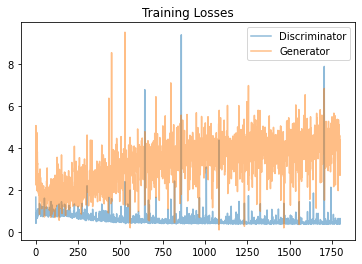

In [24]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [25]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [26]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

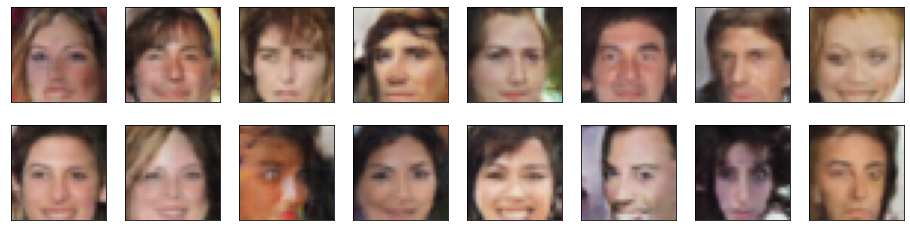

In [27]:
_ = view_samples(-1, samples)

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result


**Answer:**

At the first glance the issue at hand seems to be similar presented in SVHN DCGAN example. Thus, I used proposed DCGAN architecture as a base.

For discriminator:
<img src='assets/conv_discriminator.png' width=80%/>

For generator:
<img src='assets/conv_generator.png' width=80%/>

Leaving original parameters (`d_conv_dim=128` and `g_conv_dim=128`) lead that network training loop took very long time to continue. After leaving the network to trian over night it was able to achieve only around 150 epochs and error was oscillating quite badly.

After changing both `d_conv_dim` and `g_conv_dim` to 32 the network was able to train faster. Though, I would not say that faces generated after 50 epochs looks very realistic. The ending errors were 0.0825 for discriminator loss and 4.5411 for generator loss. Please see some generated faces examples below.

<img src='assets/face_generator_attempt_1.png' width=80%/>

Next I tried to increase both `d_conv_dim` and `g_conv_dim` to 64. It seemed still to take reasonable time to train: 50 epochs it took around 1,5 hours on GPU.
Though resulting looses don't look that differen (1.1949 for discriminator error and 0.4985 for generator loss) overall generated faces looks a bit better (meaning a bit more realistic)

<img src='assets/face_generator_attempt_2.png' width=80%/>

Next I wanted to check if applying smooth parameter (meaning measuring real loss against 0.9 but not 1) when training the discriminator help the network to converge faster.

Honestly speaking, I do not observe that much difference in how generator and discriminator loss are behaving. Seems like they are oscillating quite a lot but going down slowly.

<img src='assets/face_generator_attempt_3_loss.png' width=80%/>

Even though some generated images still look horrible, some looks quite good actually (e.g. bottom left face with glasses).

<img src='assets/face_generator_attempt_3.png' width=80%/>

Thus, next logical step is to train the network a bit longer. I decided to train it for 100 epochs and compare the results.
Even though loss seems to stay around the same values for both generator and discriminator, generated images seems to look way better.

<img src='assets/face_generator_attempt_4.png' width=80%/>

*Possible ways to improve*

* One possible way to improve is to increase the amount of convolutional layers both in generator and discriminator. For example, adding one more convolution layer and convolutional transpose layer to generator and discriminator gives a bit better images even after 50 epochs.

<img src='assets/face_generator_attempt_5.png' />

Even though some faces look quite bad, it seems that network could recognize face features a bit better. Thus, there is a very high chance that after training more it could produce better results. Once caveat, that adding just this 2 additional layers doubled training time.

* Sice data set is quite limited another idea would be to implement cycle GAN architecture. But since there is no need to predict different domain like in a style transfer example, it would be probable enough to create something like autoencoder. In this case additional error could be calculated by computing a loss comparing converted auto-encoded representation back to original image. Though, as suggested in CycleGAN paper, in this case square mean loss function should be used instead.

```
real image -> CNN -> features -> generator -> reconstructed image
g_loss = reconstructed_loss + real_loss(D(reconstructed_image))

```

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "problem_unittests.py" files in your submission.